# Mini Project 2: Binary Search
### We consider the problem of (efficiently) searching for a value in a list of numbers. 
#### - Generate a list of numbers that is suitably large
#### - Write a function that performs a linear search for the given value on this list. This function will be the reference implementation for correctness        and performance. 
#### - The running time of a linear search is O(n). Verify this by testing it on lists of different sizes and plotting the search time. Note that we need          to call the search method multiple times for each value of n, and aggregate the running times – can you explain why?
#### - Implement the recursive version of Binary Search as discussed in class. Use your implementation of LinearSearch to verify correctness
#### - Measure the running time of BinarySearch and plot it. Do you get close to O(lg n)?

##### 1. Generate a List of Numbers

In [14]:
def generate_sorted_list(size):
    return list(range(size))
numbers = generate_sorted_list(1000000)  


##### 2. Linear Search Function

In [15]:
def linear_search(lst, target):
    for index, value in enumerate(lst):
        if value == target:
            return index
    return -1


##### 3. Verify Running Time of Linear Search (O(n))

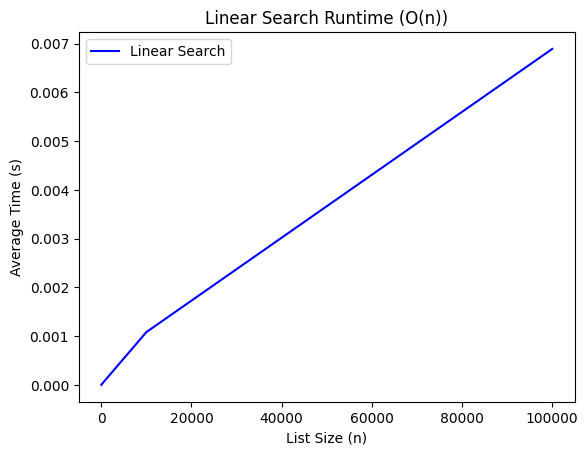

In [16]:
import time
import matplotlib.pyplot as plt

def measure_linear_search():
    sizes = [10, 100, 1000, 10000, 100000]
    times = []

    for size in sizes:
        lst = generate_sorted_list(size)
        target = size - 1  

        
        start_time = time.time()
        for _ in range(100): 
            linear_search(lst, target)
        end_time = time.time()

        avg_time = (end_time - start_time) / 100
        times.append(avg_time)

    # Plot the results
    plt.plot(sizes, times, label='Linear Search', color='blue')
    plt.xlabel('List Size (n)')
    plt.ylabel('Average Time (s)')
    plt.title('Linear Search Runtime (O(n))')
    plt.legend()
    plt.show()

measure_linear_search()



##### 4. Recursive Binary Search Function

In [17]:
def binary_search(lst, target, low, high):
    if low > high:
        return -1
    mid = (low + high) // 2
    if lst[mid] == target:
        return mid
    elif lst[mid] < target:
        return binary_search(lst, target, mid + 1, high)
    else:
        return binary_search(lst, target, low, mid - 1)

def binary_search_wrapper(lst, target):
    return binary_search(lst, target, 0, len(lst) - 1)



##### 5. Verify Correctness

In [18]:
def verify_correctness():
    lst = generate_sorted_list(1000)
    target = 500  # Example target within the list

    linear_result = linear_search(lst, target)
    binary_result = binary_search_wrapper(lst, target)

    print(f"Linear Search Result: {linear_result}")
    print(f"Binary Search Result: {binary_result}")

    assert linear_result == binary_result, "Mismatch found!"
    print("Both searches are correct!")
    
verify_correctness()


Linear Search Result: 500
Binary Search Result: 500
Both searches are correct!


##### 6. Measure Running Time of Binary Search (O(log n))

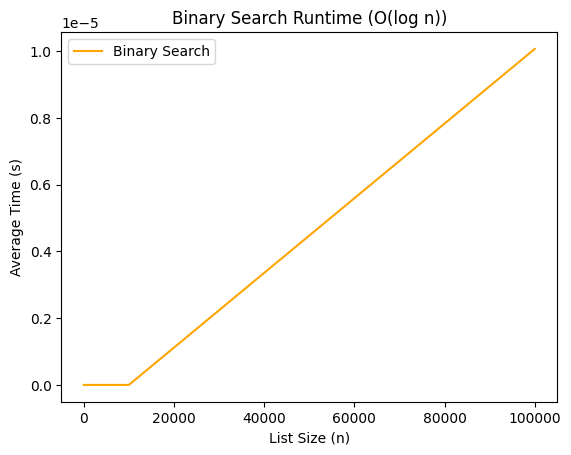

In [19]:
def measure_binary_search():
    sizes = [10, 100, 1000, 10000, 100000]
    times = []

    for size in sizes:
        lst = generate_sorted_list(size)
        target = size - 1  

       
        start_time = time.time()
        for _ in range(100): 
            binary_search_wrapper(lst, target)
        end_time = time.time()

        avg_time = (end_time - start_time) / 100
        times.append(avg_time)

    
    plt.plot(sizes, times, label='Binary Search', color='orange')
    plt.xlabel('List Size (n)')
    plt.ylabel('Average Time (s)')
    plt.title('Binary Search Runtime (O(log n))')
    plt.legend()
    plt.show()

measure_binary_search()



##### 7. Final Comparison: Linear Search vs Binary Search

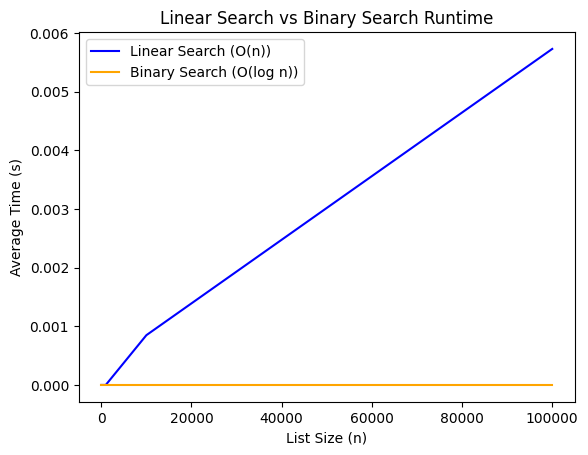

In [20]:
def compare_search_methods():
    sizes = [10, 100, 1000, 10000, 100000]
    linear_times = []
    binary_times = []

    for size in sizes:
        lst = generate_sorted_list(size)
        target = size - 1  # Worst case: search for the last element

        # Linear Search
        start_time = time.time()
        for _ in range(100):
            linear_search(lst, target)
        end_time = time.time()
        linear_times.append((end_time - start_time) / 100)

        # Binary Search
        start_time = time.time()
        for _ in range(100):
            binary_search_wrapper(lst, target)
        end_time = time.time()
        binary_times.append((end_time - start_time) / 100)

    # Plot both results
    plt.plot(sizes, linear_times, label='Linear Search (O(n))', color='blue')
    plt.plot(sizes, binary_times, label='Binary Search (O(log n))', color='orange')
    plt.xlabel('List Size (n)')
    plt.ylabel('Average Time (s)')
    plt.title('Linear Search vs Binary Search Runtime')
    plt.legend()
    plt.show()

compare_search_methods()
